# Tutorial 11 - Introduction to Statistical Inference

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
- Describe real world examples of questions that can be answered with the statistical inference methods.
- Name common population parameters (e.g., mean, proportion, median, variance, standard deviation) that are often estimated using sample data, and use computation to estimate these.
- Define the following statistical sampling terms (population, sample, population parameter, point estimate, sampling distribution).
- Explain the difference between a population parameter and sample point estimate.
- Use computation to draw random samples from a finite population.
- Use computation to create a sampling distribution from a finite population.
- Describe how sample size influences the sampling distribution.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.3”

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




###  Virtual sampling simulation

In this tutorial you will study samples and sample means generated from different distributions. In real life, we rarely, if ever, have measurements for our entire population. Here, however, we will make simulated datasets so we can understand the behaviour of sample means.

Suppose we had the data science final grades for a large population of students. 

In [2]:
# run this cell to simulate a finite population
set.seed(20201) # DO NOT CHANGE
students_pop <- tibble(grade = (rnorm(mean = 70, sd = 8, n = 10000)))
students_pop

grade
<dbl>
82.47102
73.29210
72.24852
⋮
72.65407
83.26502
68.36166


**Question 1.0** 
<br> {points: 1}

Visualize the distribution of the population (`students_pop`) that was just created by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `pop_dist` and give x-axis a descriptive label.

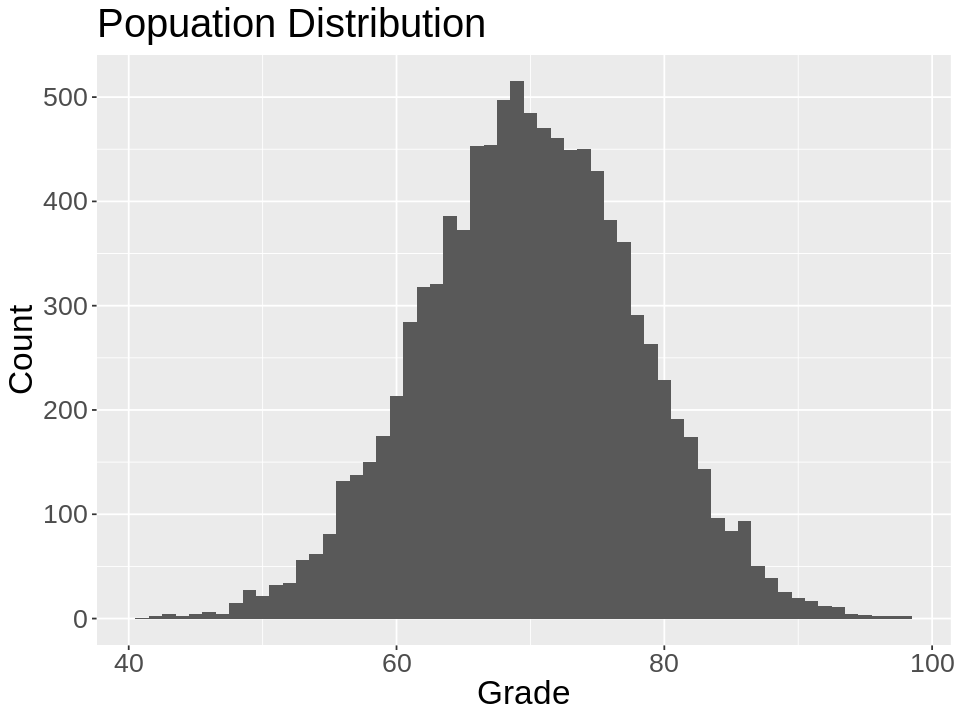

In [3]:
options(repr.plot.width = 8, repr.plot.height = 6)
# ... <- ggplot(..., ...) + 
#    geom_...(...) +
#    ... +
#    ggtitle("Population distribution")

pop_dist <- ggplot(students_pop, aes(x = grade)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Grade", y = "Count") +
    ggtitle("Popuation Distribution") +
    theme(text = element_text(size = 20))
pop_dist

In [43]:
test_1.0()

[1] "Success!"


**Question 1.1** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. 

This is normal distribution with bell shape curve centered around the mean and is roughly symmetric. 

**Question 1.2** 
<br> {points: 1}

Use `summarise` to calculate the following population parameters from the `students_pop` population:
- mean (use the `mean` function)
- median (use the `median` function)
- standard deviation (use the `sd` function)

Name this data frame `pop_parameters` which has the column names `pop_mean`, `pop_med` and `pop_sd`.

In [4]:
pop_parameters <- students_pop %>%
    summarize(
        pop_mean = mean(grade),
        pop_med = median(grade),
        pop_sd = sd(grade))
pop_parameters

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
70.03288,70.01299,8.05165


In [5]:
test_1.2()

[1] "Success!"


**Question 1.2.1** 
<br> {points: 1}

Draw one random sample of 5 students from our population of students (`students_pop`). 
Use `summarize` to calculate the mean, median, and standard deviation for these 5 students.

Name this data frame `ests_5` which should have column names `mean_5`, `med_5` and `sd_5`. Use the seed `4321`. 

In [11]:
set.seed(4321) # DO NOT CHANGE!

sample_5 <- rep_sample_n(students_pop, size = 5)

ests_5 <- sample_5 %>%
    summarize(
        mean_5 = mean(grade),
        med_5 = median(grade),
        sd_5 = sd(grade))
ests_5

`summarise()` ungrouping output (override with `.groups` argument)



replicate,mean_5,med_5,sd_5
<int>,<dbl>,<dbl>,<dbl>
1,69.76367,73.5182,16.88339


In [9]:
test_1.2.1()

[1] "Success!"


**Question 1.2.2** Multiple Choice:
<br> {points: 1}

Which of the following is the point estimate for the average final grade for the population of data science students (rounded to two decimal places)? 

A. 70.03 

B. 69.76

C. 73.52

D. 8.05 

*Assign your answer to an object called `answer1.2.2`. Your answer should be a single character surrounded by quotes.*

In [10]:
answer1.2.2 <- "B"

In [12]:
test_1.2.2()

[1] "Success!"


**Question 1.2.3** 
<br> {points: 1}

Draw one random sample of 100 students from our population of students (`students_pop`). Use `summarize` to calculate the mean, median and standard deviation for these 100 students.

Name this data frame `ests_100` which has the column names `mean_100`, `med_100` and `sd_100`. Use the seed `4321`. 

In [15]:
set.seed(4321) # DO NOT CHANGE!

sample_100 <- rep_sample_n(students_pop, size = 100)

ests_100 <- sample_100 %>%
    summarize(
    mean_100 = mean(grade),
    med_100 = median(grade),
    sd_100 = sd(grade))
ests_100

`summarise()` ungrouping output (override with `.groups` argument)



replicate,mean_100,med_100,sd_100
<int>,<dbl>,<dbl>,<dbl>
1,71.57394,73.53689,7.998619


In [16]:
test_1.2.3()

[1] "Success!"


### Exploring the sampling distribution of the sample mean for different populations
We will create the sampling distribution of the sample mean by taking 1500 random samples of size 5 from this population and visualize the distribution of the sample means. 


**Question 1.3** 
<br> {points: 1}

Draw 1500 random samples from our population of students (`students_pop`). Each sample should have 5 observations. Name the data frame `samples` and use the seed `4321`.

In [19]:
# ... <- rep_sample_n(..., size = ..., reps = ...)
set.seed(4321) # DO NOT CHANGE!

samples <- rep_sample_n(students_pop, size = 5, reps = 1500)

head(samples)
tail(samples)
dim(samples)

replicate,grade
<int>,<dbl>
1,59.23913
1,76.06602
1,73.51820
1,92.08262
1,47.91240
2,85.42029


replicate,grade
<int>,<dbl>
1499,67.25662
1500,71.57016
1500,62.44389
1500,76.56512
1500,71.66241
1500,76.21743


[1] 7500    2

In [20]:
test_1.3()

[1] "Success!"


**Question 1.4** 
<br> {points: 1}

Group by the sample replicate number, and then for each sample, calculate the mean. Name the data frame `sample_estimates`. The data frame should have the column names `replicate` and `sample_mean`.

In [21]:
sample_estimates <- samples %>%
    group_by(replicate) %>%
    summarize(sample_mean = mean(grade))

head(sample_estimates)
tail(sample_estimates)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_mean
<int>,<dbl>
1,69.76367
2,75.22476
3,69.90881
4,66.11345
5,75.26159
6,63.41461


replicate,sample_mean
<int>,<dbl>
1495,65.80124
1496,66.44409
1497,67.86570
1498,69.39292
1499,70.64449
1500,71.69180


In [22]:
test_1.4()

[1] "Success!"


**Question 1.5** 
<br> {points: 1}

Visualize the distribution of the sample estimates (`sample_estimates`) you just calculated by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `sampling_distribution` and give the plot (using `ggtitle`) and the x axis a descriptive label.

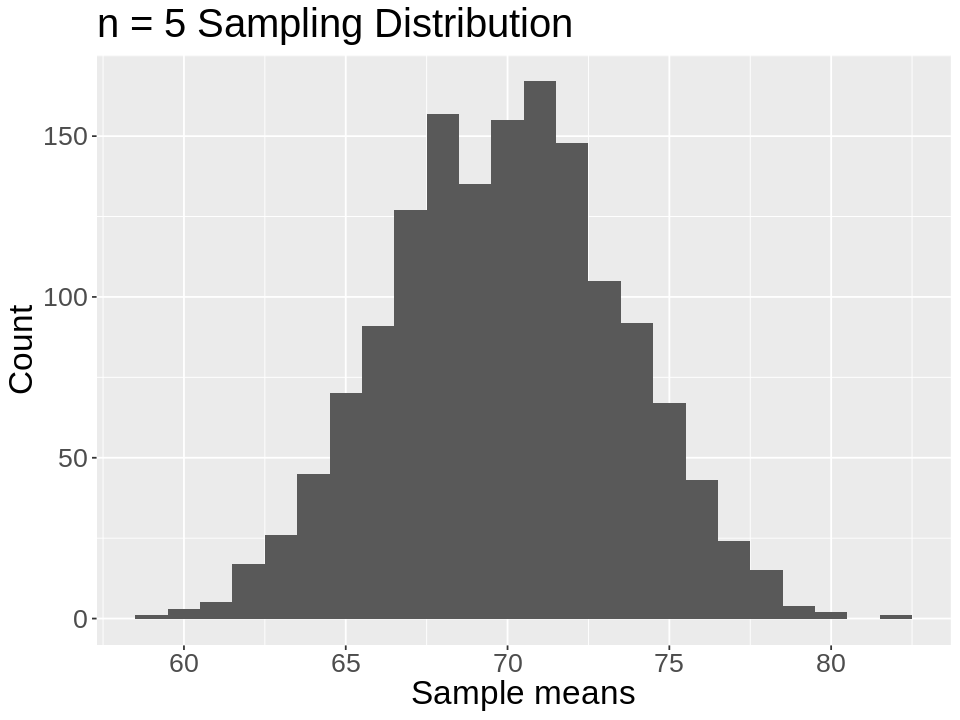

In [23]:
options(repr.plot.width = 8, repr.plot.height = 6)

sampling_distribution_5 <- ggplot(sample_estimates, aes(x = sample_mean)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Sample means", y = "Count") +
    ggtitle("n = 5 Sampling Distribution") +
    theme(text = element_text(size = 20))

sampling_distribution_5

In [24]:
test_1.5()

[1] "Success!"


**Question 1.6** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution to the population distribution of students' grades above. 

The distribution is bell-shaped, with one large peak in the middle centered at the population mean. The sample means range from 60 to 80%, but most samples had a mean between about 65 to 75%. The shape of the sampling distribution is the same (bell-shaped, one peak, symmetric), but the spread is smaller than that of the population distribution.

**Question 1.6.1** 
<br> {points: 3}

Repeat **Q1.3 - 1.5**, but now for 100 observations:  
1. Draw 1500 random samples from our population of students (`students_pop`). Each sample should have 100 observations. Use the seed `4321`.
2. Group by the sample replicate number, and then for each sample, calculate the mean (call this column `sample_mean_100`).
3. Visualize the distribution of the sample estimates you calculated by plotting a histogram using `binwidth = 0.5` in the `geom_histogram` argument. Name the plot `sampling_distribution_100` and give the plot title (using `ggtitle`) and the x axis a descriptive label.

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Ignoring unknown parameters: bindwidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



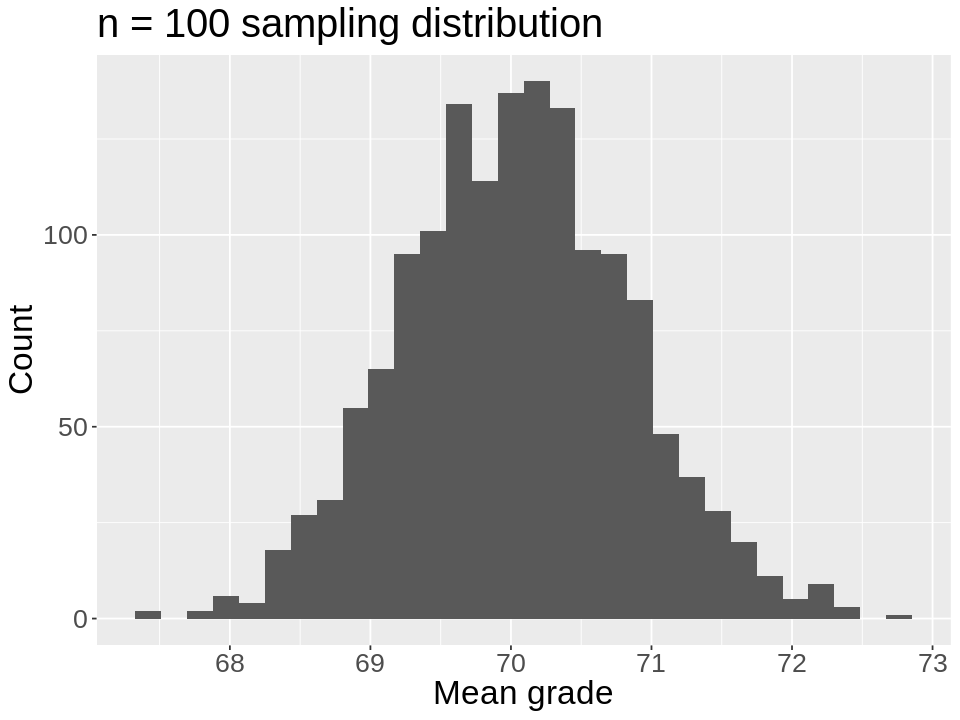

In [27]:
set.seed(4321) # DO NOT CHANGE!

sample_100 <- rep_sample_n(students_pop, size = 100, reps = 1500)

ests_100 <- sample_100 %>%
    group_by(replicate) %>%
    summarize(sample_mean_100 = mean(grade))

sampling_distribution_100 <- ggplot(ests_100, aes(sample_mean_100)) +
    geom_histogram(bindwidth = 0.5) +
    labs(x = "Mean grade", y = "Count") +
    ggtitle("n = 100 sampling distribution") +
    theme(text = element_text(size = 20))
sampling_distribution_100

In [26]:
set.seed(4321) # DO NOT CHANGE!

# We check that you've created objects with the right names below
# But all other tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.
test_that('Did not create objects named sampling_distribution_100', {
    expect_true(exists("sampling_distribution_100")) 
    })


**Question 1.6.2** 
<br> {points: 3}

*Suppose we do not know the parameter value for the population of data science students (as is usually the case in real life).* Compare your point estimates for the population mean from **Q1.2.1 and 1.2.3** above. Which of the two point estimates is more likely to be closer to the actual value of the average final grade of the population of data science students? Briefly explain. (Hint: look at the sampling distributions for your samples of size 5 and size 100 to help you answer this question).

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 1.7**
<br> {points: 1}

Let's create a simulated dataset of the number of cups of coffee drunk per week for our population of students. 
Describe in words the distribution, comment on the shape, center and how spread out the distribution is. 

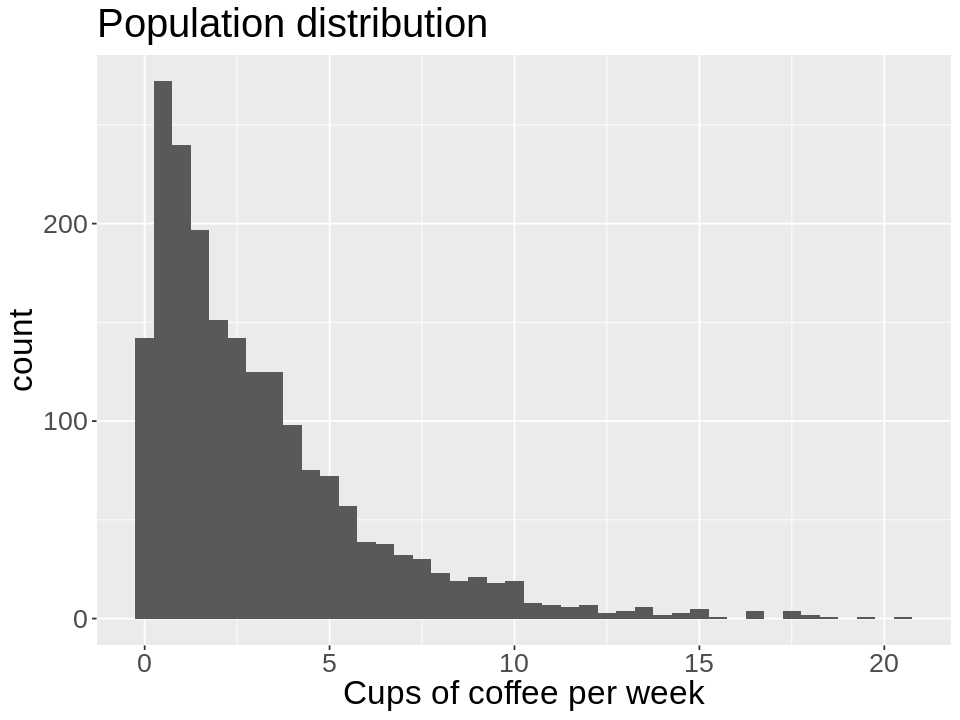

In [28]:
# run this cell to simulate a finite population
set.seed(2020) # DO NOT REMOVE
coffee_data = tibble(cups = rexp(n = 2000, rate = 0.34))

coffee_dist <- ggplot(coffee_data, aes(cups)) + 
    geom_histogram(binwidth = 0.5) +
    xlab("Cups of coffee per week") +
    ggtitle("Population distribution") +
    theme(text = element_text(size = 20))
coffee_dist

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 1.8**
<br> {points: 1}

Draw 1500 random samples from `coffee_data`. Each sample should have 5 observations. Assign this data frame to an object called `coffee_samples_5`.

Group by the sample replicate number, and then for each sample, calculate the mean. Name the data frame `coffee_sample_estimates_5`. The data frame should have the column names `replicate` and `coffee_sample_mean_5`.

Finally, create a plot of the sampling distribution called `coffee_sampling_distribution_5`.

> Hint: a bindwidth of 1 is a little too big for this data, try a bindwidth of 0.5 instead.

`summarise()` ungrouping output (override with `.groups` argument)



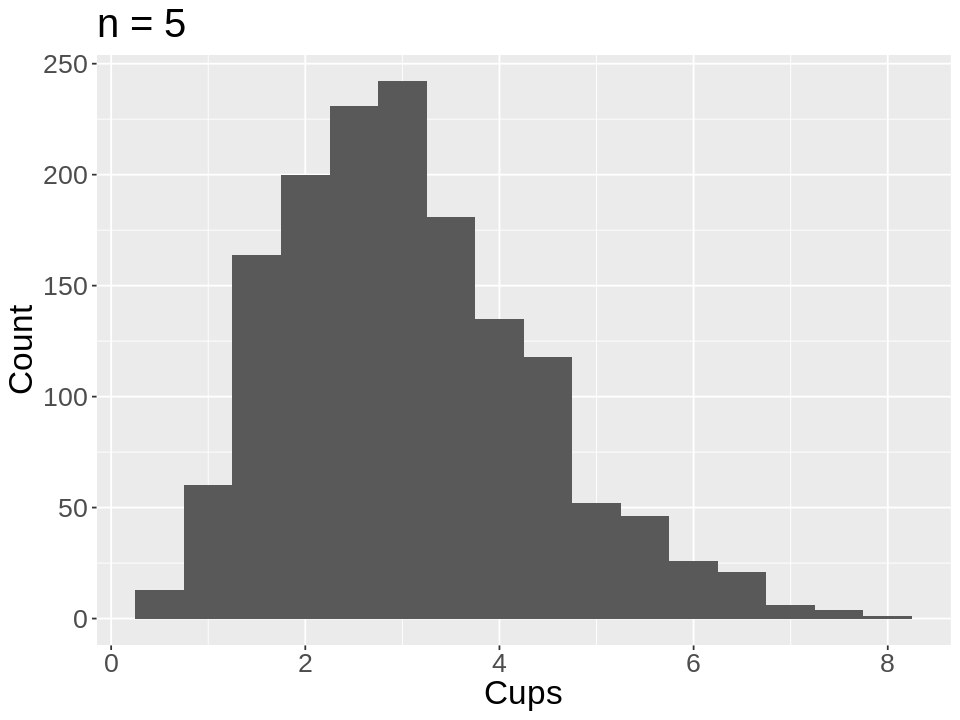

In [29]:
set.seed(4321) # DO NOT CHANGE!

coffee_samples_5 <- rep_sample_n(coffee_data, size = 5, reps = 1500) 

coffee_sample_estimates_5 <- coffee_samples_5 %>%
    group_by(replicate) %>%
    summarize(coffee_sample_mean_5 = mean(cups))

coffee_sampling_distribution_5 <- ggplot(coffee_sample_estimates_5, aes(x = coffee_sample_mean_5)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Cups", y = "Count") +
    ggtitle("n = 5") +
    theme(text = element_text(size = 20))
coffee_sampling_distribution_5

In [30]:
test_1.8()

[1] "Success!"


**Question 1.9** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution to the population distribution above. 

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 2.0** 
<br> {points: 1}

Draw 1500 random samples from `coffee_data`. Each sample should have 5 observations. Assign this data frame to an object called `coffee_samples_30`.

Group by the sample replicate number, and then for each sample, calculate the mean. Name the data frame `coffee_sample_estimates_30`. The data frame should have the column names `replicate` and `coffee_sample_mean_30`.

Finally, create a plot of the sampling distribution called `coffee_sampling_distribution_30`.

> Hint: use `xlim` to control the x-axis limits so that they are similar to those in the histogram above. This will make it easier to compare this histogram with that one.

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


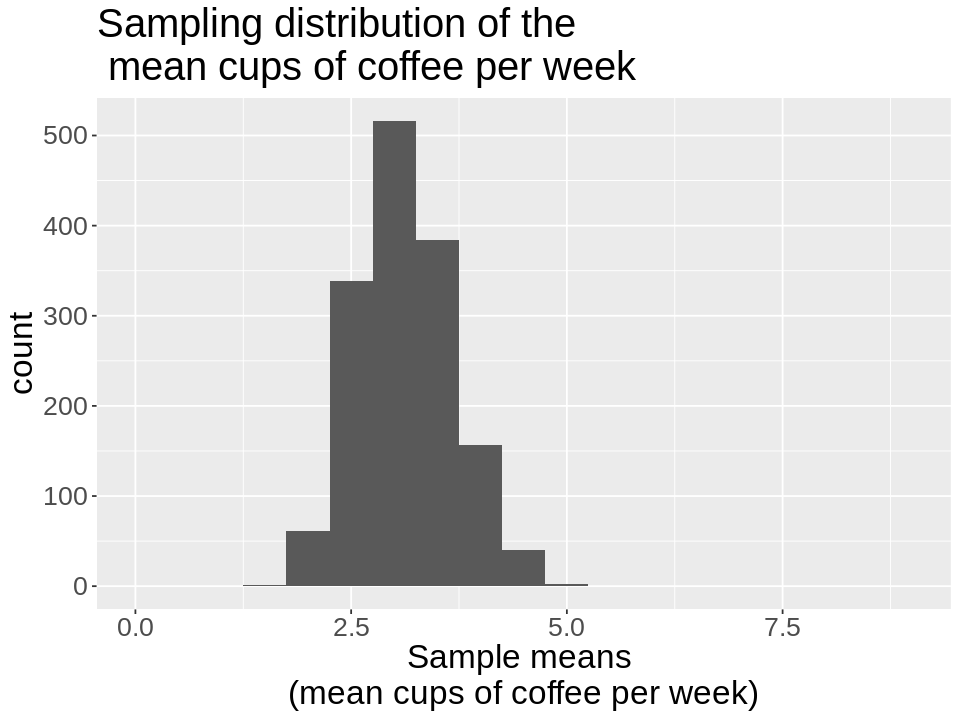

In [36]:
set.seed(4321) # DO NOT CHANGE!

coffee_samples_30 <- rep_sample_n(coffee_data, size = 30, reps = 1500)

coffee_sample_estimates_30 <- coffee_samples_30 %>%
    group_by(replicate) %>%
    summarize(coffee_sample_mean_30 = mean(cups)) 

coffee_sampling_distribution_30 <- ggplot(coffee_sample_estimates_30, aes(x = coffee_sample_mean_30))+
    geom_histogram(binwidth = 0.5) +
    xlim(c(0,9)) +
    xlab("Sample means \n(mean cups of coffee per week)") +
    ggtitle("Sampling distribution of the \n mean cups of coffee per week") +
    theme(text = element_text(size = 20))

coffee_sampling_distribution_30 

In [37]:
test_2.0()

[1] "Success!"


**Question 2.1** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution with samples of size 30 to the sampling distribution with samples of size 5. 

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

In [ ]:
source('cleanup.R')